# Assignment 9
Let us perform FFT on functions which are discontinuous when periodically extended. An
example of this is sin($\sqrt{2}$t). The discontiuity causes fourier components in frequencies other than
the sinusoids frequency which decay as 1/$w$ , due to Gibbs phenomenon. We resolve this problem
using the process of windowing. We use this windowed transform to analyse signals known to contain a
sinusoid of unknown frequencies and extract its phase and frequency. We then perform a sliding
DFT on a chirped signal and plot a spectrogram or a time-frequency plot.

In [ ]:
from pylab import *

## Question 1
### Spectrum of sin($\sqrt{2}$t)

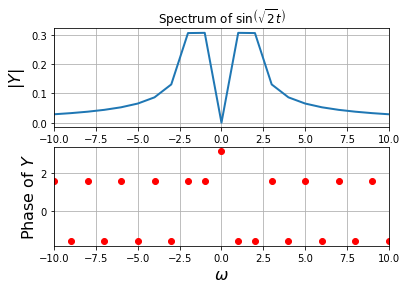

In [2]:
t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=sin(sqrt(2)*t)
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

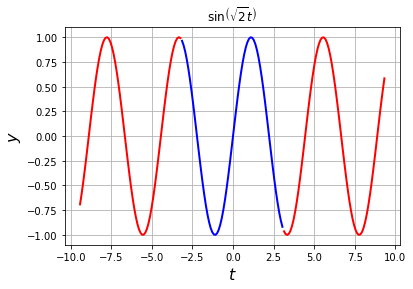

In [3]:
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
# y=sin(sqrt(2)*t)
figure(2)
plot(t1,sin(sqrt(2)*t1),'b',lw=2)
plot(t2,sin(sqrt(2)*t2),'r',lw=2)
plot(t3,sin(sqrt(2)*t3),'r',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)
savefig("fig10-2.png")
show()

However, when we calculate the DFT by sampling over a finite time window, we end up
calculating the DFT of the following periodic signal:

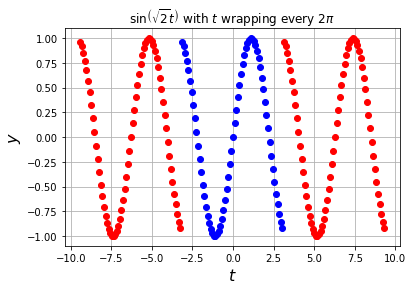

In [4]:
t1=linspace(-np.pi,np.pi,65);t1=t1[:-1]
t2=linspace(-3*np.pi,-np.pi,65);t2=t2[:-1]
t3=linspace(np.pi,3*np.pi,65);t3=t3[:-1]
t4=linspace(-3*np.pi,3*np.pi,);t4=t4[:-1]
y=sin(sqrt(2)*t1)
figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'ro',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

This results in discontinuites in the signal. These discontinuities lead to spectral components
which decay as 1/ω. To confirm this, we plot the spectrum of the periodic ramp below:

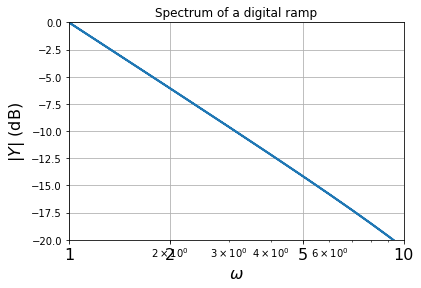

In [5]:
t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=t
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
semilogx(abs(w),20*log10(abs(Y)),lw=2)
xlim([1,10])
ylim([-20,0])
xticks([1,2,5,10],["1","2","5","10"],size=16)
ylabel(r"$|Y|$ (dB)",size=16)
title(r"Spectrum of a digital ramp")
xlabel(r"$\omega$",size=16)
grid(True)
savefig("fig10-4.png")
show()

We can observe that the error in previous fft is due to the sudden jumps of input signal. 

### Hamming Window
We resolve the problem of discontinuities by attenuating the signal near the endpoints of our time
window, to reduce the discontinuities caused by periodically extending the signal. This is done by
multiplying by a so called windowing function.

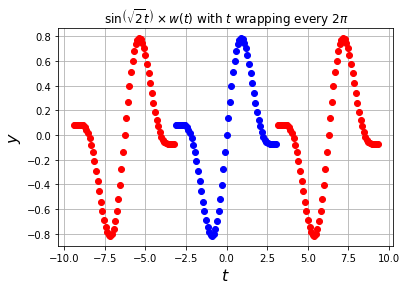

In [6]:
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/63))
y=sin(sqrt(2)*t1)*wnd
figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'ro',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

This is the plot of our windowing function in time domain. We can clearly see that we are trying to attenuate at end points.

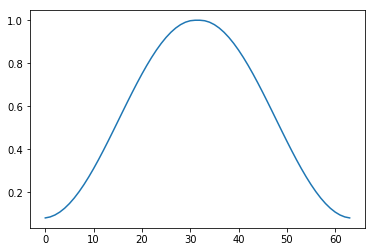

In [7]:
plot(wnd)

### FFT after windowing

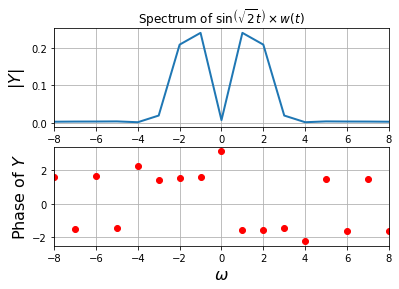

In [8]:
t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(64)
wnd=fftshift(0.54+0.46*cos(2*pi*n/63))
y=sin(sqrt(2)*t)*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-8,8])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-8,8])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

Let us make it crystal clear by increasing window size.

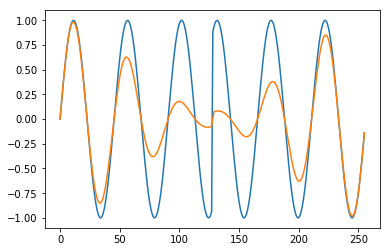

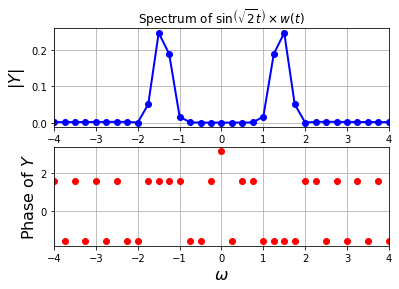

In [9]:
t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(256)
wnd=fftshift(0.54+0.46*cos(2*pi*n/256))
y=sin(sqrt(2)*t)
plot(fftshift(y))
# y=sin(1.25*t)
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
plot(y)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),'ro',lw=2)
xlim([-4,4])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

## Question 2
### Spectrum of $cos^3(0.86t)$ without windowing

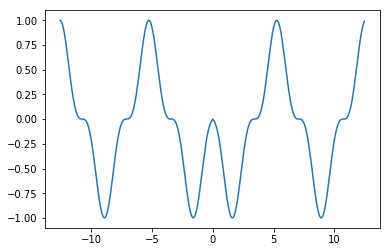

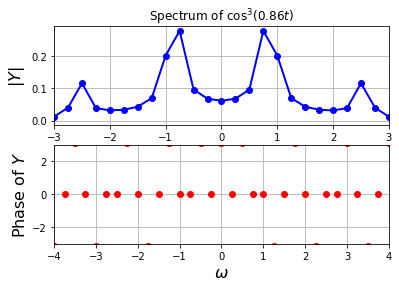

In [10]:
t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=(cos(0.86*t))**3
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y)# make y start with y(t=0)
plot(t,y)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
ylabel(r"$|Y|$",size=16)
xlim([-3,3])
title(r"Spectrum of $\cos^3(0.86t)$")
grid(True)
subplot(2,1,2)
i=where(abs(Y)>1e-3)
plot(w[i],((angle(Y[i]))),'ro',lw=2)
xlim([-4,4])
ylim([-3,3])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

### Spectrum of $cos^3(0.86t)$ with windowing

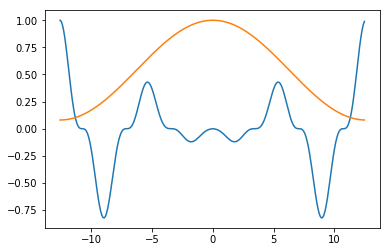

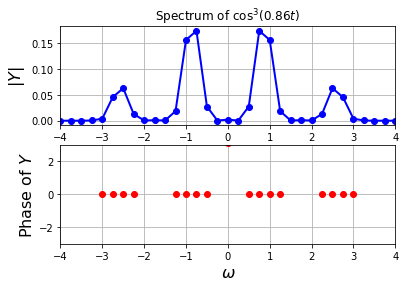

In [11]:
t=linspace(-4*pi,4*pi,257);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(256)
wnd=fftshift(0.54+0.46*cos(2*pi*n/256))
y=(cos(0.86*t))**3
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
plot(t,y,t,wnd)
Y=fftshift(fft(y))/256.0
w=linspace(-pi*fmax,pi*fmax,257);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\cos^3(0.86t)$")
grid(True)
subplot(2,1,2)
i=where(abs(Y)>1e-3)
plot(w[i],angle(Y[i]),'ro',lw=2)
xlim([-4,4])
ylim([-3,3])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

## Question 3
### Estimating $w$ and $\phi$ 

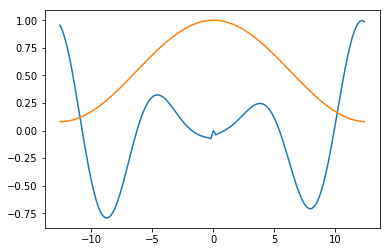

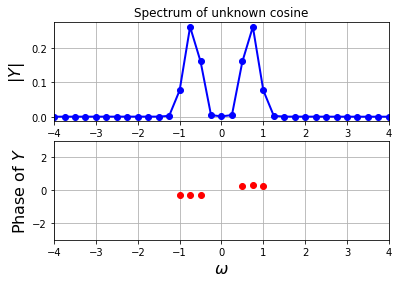

In [108]:
t=linspace(-4*pi,4*pi,129)
t=t[:-1]
omega=0.7
phase=0.3
y=cos(omega*t+phase)
dt=t[1]-t[0];fmax=1/dt
n=arange(128)
wnd=fftshift(0.54+0.46*cos(2*pi*n/128))
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
plot(t,y,t,wnd)
Y=fftshift(fft(y))/128
w=linspace(-pi*fmax,pi*fmax,129);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of unknown cosine")
grid(True)
subplot(2,1,2)
i=where(abs(Y)>1e-2)
plot(w[i],angle(Y[i]),'ro',lw=2)
xlim([-4,4])
ylim([-3,3])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

We will estimate phase and angular frequency by taking the average of phase and frequency at points where the considerable magnitude is present.

In [1]:
ii=i[0]
print(w[ii])
ww=w[ii][:len(w[ii])//2]
abst=abs(Y)[ii][:len(abs(Y)[ii])//2]
estimated_w=-sum(abst*ww)/sum(abst)
ang=angle(Y)[ii][:len(angle(Y)[ii])//2]
estimated_phi=-(sum(ang)/len(ang))

NameError: name 'i' is not defined

In [110]:
print(estimated_w)
print(estimated_phi)

0.7079072572004657
0.29634287744684723


## Question 4
### Estimating $w$ and $\phi$ (with noise) 

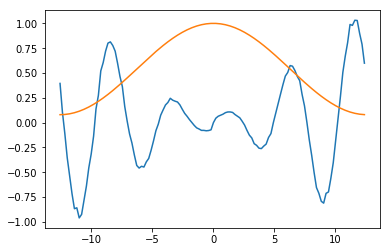

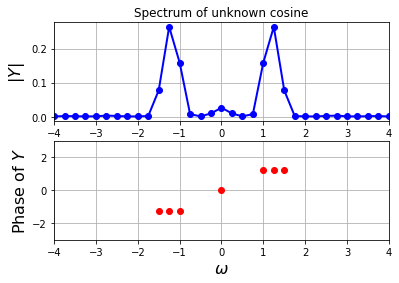

In [112]:
t=linspace(-4*pi,4*pi,129)
t=t[:-1]
omega=1.2
phase=1.25
y=cos(omega*t+phase)
y=y+(rand(129)*0.1)[:-1]
dt=t[1]-t[0];fmax=1/dt
n=arange(128)
wnd=fftshift(0.54+0.46*cos(2*pi*n/128))
y=y*wnd
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
plot(t,y,t,wnd)
Y=fftshift(fft(y))/128
w=linspace(-pi*fmax,pi*fmax,129);w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
xlim([-4,4])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of unknown cosine")
grid(True)
subplot(2,1,2)
i=where(abs(Y)>1e-2)
plot(w[i],angle(Y[i]),'ro',lw=2)
xlim([-4,4])
ylim([-3,3])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

In [113]:
ii=i[0]
print(w[ii])
ww=w[ii][:len(w[ii])//2]
abst=abs(Y)[ii][:len(abs(Y)[ii])//2]
estimated_w=-sum(abst*ww)/sum(abst)
ang=angle(Y)[ii][:len(angle(Y)[ii])//2]
estimated_phi=-(sum(ang)/len(ang))
print(estimated_w)
print(estimated_phi)

[-1.5  -1.25 -1.    0.    1.    1.25  1.5 ]
1.209138153915868
1.2513239769924993


We used this windowed DFT to estimate the frequency and phase of an unknown sinusoid
from its samples, even if considerable amount of noise is present.

## Question 5
### Spectrum of Chirp Signal

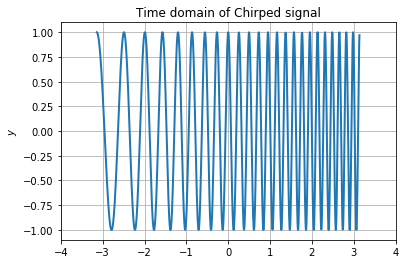

In [14]:
t=linspace(-np.pi,np.pi,1025);t=t[:-1]
dt=t[1]-t[0]
fmax=1/dt
y=cos(16*(1.5+t/(2*np.pi))*t)
plot(t,y,lw=2)
xlim([-4,4])
ylabel(r"$y$")
title(r"Time domain of Chirped signal")
grid(True)

### Without Windowing

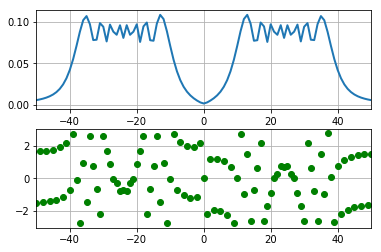

In [15]:
y=fftshift(y)
Y=fftshift(fft(y))/1024
w=linspace(-fmax*pi,fmax*pi,1025)
w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-50,50])
grid(True)
subplot(2,1,2)
i=where(abs(Y)>1e-4)
plot(w[i],angle(Y[i]),"go")
xlim([-50,50])
grid(True)

### With Windowing

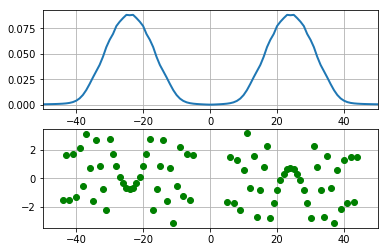

In [73]:
t=linspace(-pi,pi,1025)
t=t[:-1]
dt=t[1]-t[0]
fmax=1/dt
y=cos(16*(1.5+t/(2*pi))*t)
n=arange(1024)
wnd=fftshift(0.54+0.46*cos(2*pi*n/1024))
y=y*wnd
y=fftshift(y)
Y=fftshift(fft(y))/1024
w=linspace(-fmax*pi,fmax*pi,1025)
w=w[:-1]
figure()
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-50,50])
grid(True)
subplot(2,1,2)
i=where(abs(Y)>1e-3)
plot(w[i],angle(Y[i]),"go")
xlim([-50,50])
grid(True)

We now observe that the frequencies are more confined to the range between 16 and 32, as
expected. The extra components due to the discontinuity have been suppressed due to hamming
window

## Question 6
### Spectrum vs Time, frequency
To obtain a better picture of what is going in the chirp signal, we take the DFT of a small window
of samples around each time instant, and plot a 2D surface of the resulting spectra vs time.

In [104]:
t=linspace(-pi,pi,1025);t=t[:-1]
splitted=split(t,16)

In [105]:
Ymag=zeros((16,64))
Ypha=zeros((16,64))
for i in range(16):
    tt=splitted[i]
    dt=tt[1]-tt[0]
    fmax=1/dt
    n=arange(64)
    wnd=fftshift(0.54+0.46*cos(2*pi*n/64))
    y=cos(16*(1.5+tt/(2*pi))*tt)
    y=y*wnd
    Y=fftshift(fft(fftshift(y)))/64
    w=linspace(-fmax*np.pi,fmax*np.pi,64+1)
    w=w[:-1]
    Ymag[i,:]=abs(Y)
    Ypha[i,:]=angle(Y)

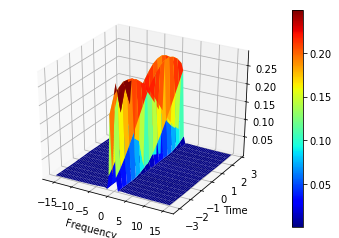

In [114]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig =figure()
ax = fig.add_subplot(111, projection='3d')
t=linspace(-pi,pi,1025);t=t[:-1]
t=t[::64]
w=linspace(-fmax*pi,fmax*pi,64+1);w=w[:-1]
t,w=np.meshgrid(t,w)
surf=ax.plot_surface(w,t,Ymag.T,rstride=1, cstride=1, cmap=cm.jet)
fig.colorbar(surf)
ylabel("Time")
xlabel("Frequency")
show()

By performing localized DFTs at different time isntants, we obtained a time-frequency plot
which allowed us to better analyse signals with varying frequencies in time.